dataset can be found at https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

In [556]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **PART 1: SELECT AND PREPARE THE DATA**
note: three columns were deleted prior to loading the data. original shape was (16744, 17)

In [557]:
# load dataset into dataframe labelled 'df_movies'
df_movies = pd.read_csv('movies.csv')

QUESTIONS
  1.   How should we measure popularity? IMDb vs. Rotten Tomatoes
  2.   Which platform has the most movies?
  3.   Are subscriptions to multiple streaming platforms necessary? What percent of movies are on more than one platform?
  4.   Does the number of streaming platforms a movie is on affect its popularity?

### **PART 2: EXPLORATORY ANALYSIS**


#### **PHASE 1: SHAPE AND STRUCTURE**

In [558]:
# shape of dataframe
df_movies.shape

(16744, 14)

In [559]:
# print sample of dataframe (first five rows)
df_movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [560]:
# understand data columns
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Directors        16018 non-null  object 
 10  Genres           16469 non-null  object 
 11  Country          16309 non-null  object 
 12  Language         16145 non-null  object 
 13  Runtime          16152 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


**QUESTION 1:** How should we measure popularity? IMDb vs. Rotten Tomatoes


In [561]:
# check for missing values in each column
df_movies.isnull().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

ANSWER: IMDb should be used to measure popularity.
* almost 70% of the Rotten Tomatoes data is missing values
* popularity should be based on IMDb as opposed to Rotten Tomatoes


In [562]:
# check for duplicate rows
duplicate = df_movies[df_movies.duplicated()]
print(duplicate.shape)

(0, 14)


In [563]:
# drop unnecessary columns
df_movies.drop(columns = ['Age', 'Rotten Tomatoes', 'Directors', 'Genres', 'Country', 'Language', 'Runtime'], inplace = True)
df_movies.head()

,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+
0,Inception,2010,8.8,1,0,0,0
1,The Matrix,1999,8.7,1,0,0,0
2,Avengers: Infinity War,2018,8.5,1,0,0,0
3,Back to the Future,1985,8.5,1,0,0,0
4,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0


In [564]:
# shape of dataframe after modifications
df_movies.shape

(16744, 7)

#### **PHASE 2: DATA VISUALIZATIONS**

##### **QUESTION 2:** Which platform has the most movies?

In [565]:
# x-axis
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [566]:
# y-axis

# df_platforms: subset of df_movies
df_platforms = df_movies[['Netflix', 'Hulu', 'Prime Video', 'Disney+']]
df_platforms = df_platforms.T

# sum number of movies on each platform
df_platforms['Total'] = df_platforms.sum(axis = 1)
df_platforms.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16705,16706,16707,16708,16709,16710,16711,16712,16713,16714,16715,16716,16717,16718,16719,16720,16721,16722,16723,16724,16725,16726,16727,16728,16729,16730,16731,16732,16733,16734,16735,16736,16737,16738,16739,16740,16741,16742,16743,Total
Netflix,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3560
Hulu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,903
Prime Video,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12354
Disney+,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,564


In [567]:
# double check values
print("Netflix:", df_movies['Netflix'].sum())
print("Hulu:", df_movies['Hulu'].sum())
print("Prime Video:", df_movies['Prime Video'].sum())
print("Disney+:", df_movies['Disney+'].sum())

Netflix: 3560
Hulu: 903
Prime Video: 12354
Disney+: 564


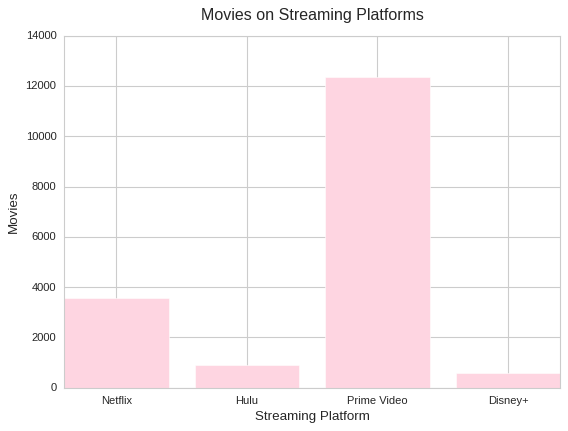

In [568]:
# bar graph

plt.style.use('seaborn-whitegrid')
plt.bar(platforms, df_platforms['Total'], color = '#FED5E1')

plt.xlabel('Streaming Platform')
plt.ylabel('Movies')

plt.title('Movies on Streaming Platforms', y = 1.03)

plt.show()

ANSWER: Prime Video has the most movies, featuring 1254 titles.

##### **QUESTION 3:** Are subscriptions to multiple streaming platforms necessary? What percent of movies are on more than one platform?

In [569]:
# df_multiples: subset/copy of df_movies
df_multiples = df_movies.filter(['Title', 'IMDb', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'], axis = 1)

# number of platforms each movie is on
df_multiples['Count'] = df_multiples[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis = 1)

# create columns with boolean values depending on result of Count column
df_multiples['One'] = df_multiples['Count'] == 1
df_multiples['Two'] = df_multiples['Count'] == 2
df_multiples['Three'] = df_multiples['Count'] == 3
df_multiples['Four'] = df_multiples['Count'] == 4

# sum number of True values in each column
one = df_multiples['One'].values.sum()
two = df_multiples['Two'].values.sum()
three = df_multiples['Three'].values.sum()
four = df_multiples['Four'].values.sum()

# no movies on all four platforms
print(four)

0


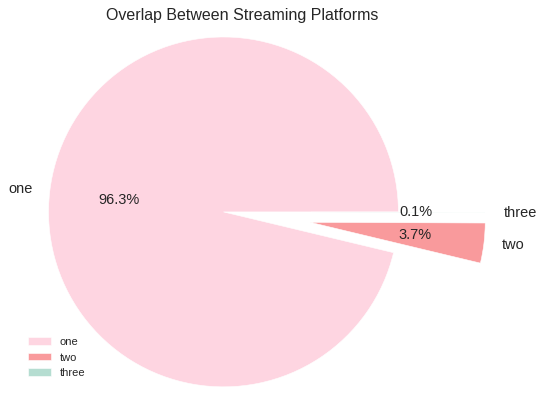

In [570]:
# pie chart

labels = ['one', 'two', 'three']
percent = [one, two, three]
colors = ['#FED5E1', '#F99A9C', '#B5DDD1']
textprops = {'fontsize': 13}

plt.style.use('seaborn-whitegrid')
plt.pie(percent, explode=[0, 0.5, 0.5], labels = labels, colors = colors, autopct = '%1.1f%%', textprops = textprops)

plt.title('Overlap Between Streaming Platforms', x = 0.45 ,y = 1.03)

plt.axis('equal')
plt.legend(labels, loc = 'lower left')

plt.show()

ANSWER: In order to have the best range of movies possible, it may be seen as necessary to have multiple subscriptions. It can be seen that only a very small percentage (3.8%) of movies are on more than one platform.

##### **QUESTION 4:** Does the number of streaming platforms a movie is on affect its popularity?

In [571]:
# df_popularity: subset/copy of df_multiples
df_popularity = df_multiples.filter(['Title', 'IMDb', 'Count'], axis = 1)

# check for missing values
df_popularity.isnull().sum()

Title      0
IMDb     571
Count      0
dtype: int64

In [572]:
# drop rows with missing values in IMDb column
df_popularity.dropna(subset = ['IMDb'], inplace = True)

In [573]:
# confirm that missing values have been handled
df_popularity.isnull().sum()

Title    0
IMDb     0
Count    0
dtype: int64

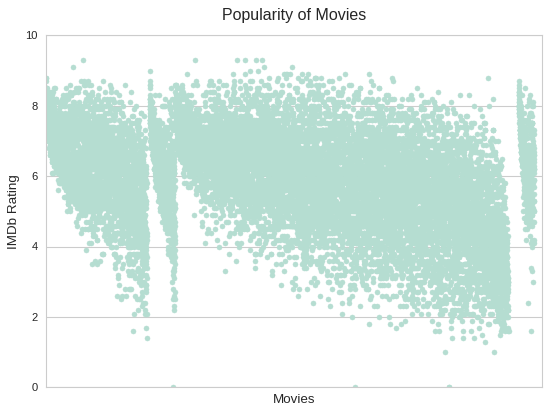

In [532]:
# scatter plot

plt.style.use('seaborn-whitegrid')
ax = plt.scatter(df_popularity.index.values, df_popularity['IMDb'], s = 20, color = '#B5DDD1')

plt.xlabel('Movies')
plt.ylabel('IMDb Rating')

plt.title('Popularity of Movies', y = 1.03)

plt.axis([0, 17000, 0, 10])
ax.axes.xaxis.set_ticks([])

plt.show()

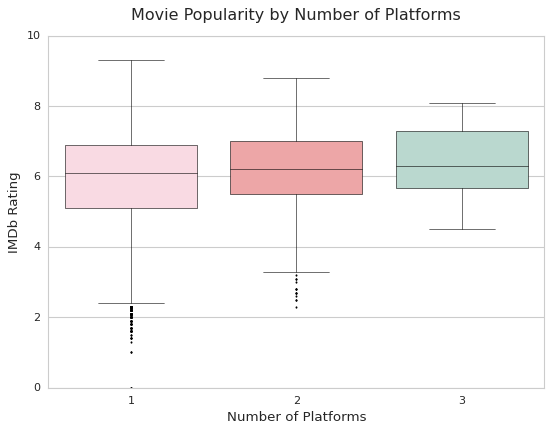

In [533]:
# box plot

colors = ['#FED5E1', '#F99A9C', '#B5DDD1', '#000000']
flierprops = dict(markerfacecolor = 'k', markeredgecolor = 'k')

sns.set_style('whitegrid',)
ax = sns.boxplot(x = 'Count', y = 'IMDb', data = df_popularity, palette = colors, linewidth = 0.5, fliersize = 1, flierprops = flierprops)

plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')

plt.xlabel('Number of Platforms')
plt.ylabel('IMDb Rating')

plt.title('Movie Popularity by Number of Platforms', y = 1.03)

plt.show()

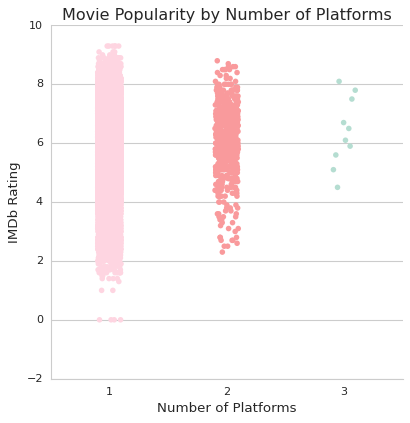

In [534]:
# cat plot

colors = ['#FED5E1', '#F99A9C', '#B5DDD1', '#000000']

sns.set_style('whitegrid',)
sns.catplot(x = 'Count', y = 'IMDb', data = df_popularity, palette = colors)

plt.xlabel('Number of Platforms')
plt.ylabel('IMDb Rating')

plt.title('Movie Popularity by Number of Platforms', y = 1.03)

plt.show()

ANSWER: The box plot above shows that the interquartile range of each of the number of platforms is surprisingly quite similar. Thus, we can conclude that the popularity of a movie is not affected by the number of platforms it streams on.